<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793469/blob/main/A01793469_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [208]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [209]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [210]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

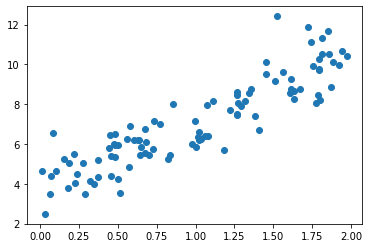

In [211]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [212]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [213]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [214]:
#X_fit[]

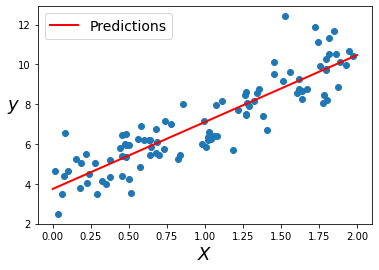

In [215]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [216]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [217]:
X_new.shape

(2, 1)

In [218]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [219]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [220]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [221]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

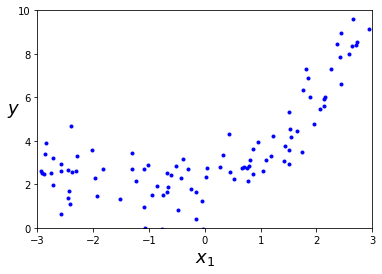

In [222]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [223]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [224]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [225]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [226]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [227]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [228]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

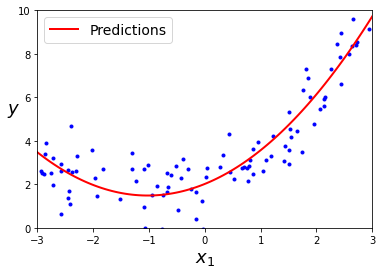

In [229]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [254]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
906,6.193682,33.355932
901,6.124839,29.785536
519,4.510989,39.014060
357,4.010712,36.572302
728,5.261029,35.821283
711,5.200223,36.200499
17,1.739201,60.572597
797,5.536360,35.230730
392,4.117804,29.964328
375,4.077339,40.966910


In [255]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [232]:
len(X)

1000

In [233]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

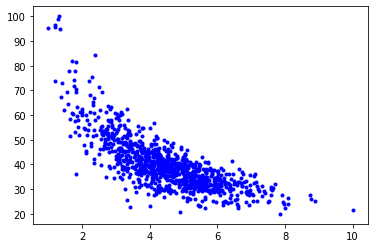

In [234]:
plt.plot(X,y,'b.')

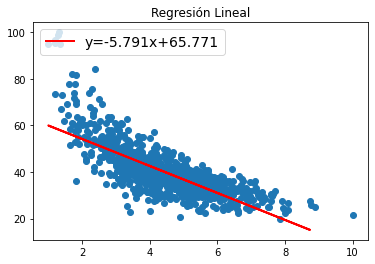

Error medio Absoluto (MAE): 5.685490744581959
Root Mean Squared Error: 8.592532381246528
r2_score 0.5437382613989759


In [256]:
#lineal
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(Xtrain, ytrain)
coef_a = round(linear_model.coef_[0], 3)
const_b = round(linear_model.intercept_, 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
line_equation = f'y={coef_a}x{sign}{const_b}'
ypred = linear_model.predict(Xtest)
plt.scatter(X, y)
plt.title('Regresión Lineal')
plt.plot(Xtest, ypred, 'r-', linewidth=2, label=line_equation)
plt.legend(loc="upper left", fontsize=14)
plt.show()
mae = metrics.mean_absolute_error(ytest, ypred)
rmse = np.sqrt(metrics.mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score', r2)

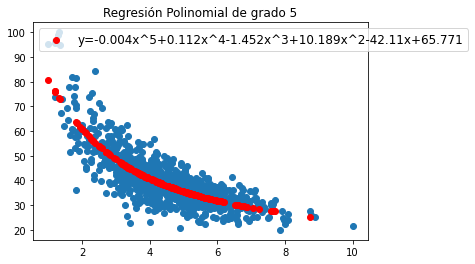

Error medio Absoluto (MAE): 4.706983771777669
Root Mean Squared Error: 6.393148486409675
r2_score 0.7474186506979172


In [259]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(5)
Xpolytrain = poly_model.fit_transform(Xtrain)
Xpolytest = poly_model.fit_transform(Xtest)
poly_linear_model = LinearRegression(fit_intercept=True)
poly_linear_model.fit(Xpolytrain, ytrain)
const_b = round(linear_model.intercept_, 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
max_degree = len(poly_linear_model.coef_) - 1
poly_equation = f'y='
for index, coef in enumerate(poly_linear_model.coef_[-1:0:-1]):
  if coef >= 0 and index:
    poly_equation += '+'
  poly_equation += str(round(coef, 3))
  poly_equation += 'x'
  current_degree = max_degree - index
  if current_degree != 1:
    poly_equation += '^'
    poly_equation += str(current_degree)
poly_equation += sign
poly_equation += str(const_b)
yppred = poly_linear_model.predict(Xpolytest)
plt.scatter(X, y)
plt.title(f'Regresión Polinomial de grado {max_degree}')
plt.scatter(Xtest, yppred, c='red', label=poly_equation)
plt.legend(loc="upper left", fontsize=12)
plt.show()
maep = metrics.mean_absolute_error(ytest, yppred)
rmsep = np.sqrt(metrics.mean_squared_error(ytest, yppred))
r2p = r2_score(ytest, yppred)
print('Error medio Absoluto (MAE):', maep)
print('Root Mean Squared Error:', rmsep)
print('r2_score', r2p)

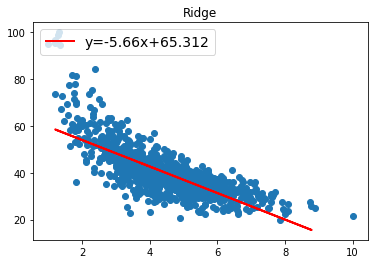

Error medio Absoluto (MAE): 5.214381554774394
Root Mean Squared Error: 7.371861879853596
r2_score 0.5543949576145202


In [237]:
#ridge
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(fit_intercept=True, alpha=100.)
ridge_model.fit(Xtrain, ytrain)
coefr_a = round(ridge_model.coef_[0], 3)
constr_b = round(ridge_model.intercept_, 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
line_equation = f'y={coefr_a}x{sign}{constr_b}'
yrpred = ridge_model.predict(Xtest)
plt.scatter(X, y)
plt.title('Ridge')
plt.plot(Xtest, yrpred, 'r-', linewidth=2, label=line_equation)
plt.legend(loc="upper left", fontsize=14)
plt.show()
maer = metrics.mean_absolute_error(ytest, yrpred)
rmser = np.sqrt(metrics.mean_squared_error(ytest, yrpred))
r2r = r2_score(ytest, yrpred)
print('Error medio Absoluto (MAE):', maer)
print('Root Mean Squared Error:', rmser)
print('r2_score', r2r)

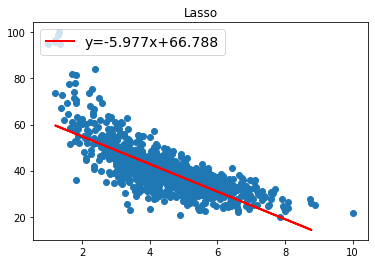

Error medio Absoluto (MAE): 5.2459962163020135
Root Mean Squared Error: 7.361449643288377
r2_score 0.5556528402321457


In [238]:
#Lasso
lasso_model = Lasso(fit_intercept=True, alpha=0.1)
lasso_model.fit(X, y)
coefl_a = round(lasso_model.coef_[0], 3)
constl_b = round(lasso_model.intercept_, 3)
if constl_b >= 0:
  sign = '+'
else:
  sign = '-'
line_equation = f'y={coefl_a}x{sign}{constl_b}'
ylpred = lasso_model.predict(Xtest)
plt.scatter(X, y)
plt.title('Lasso')
plt.plot(Xtest, ylpred, 'r-', linewidth=2, label=line_equation)
plt.legend(loc="upper left", fontsize=14)
plt.show()
mael = metrics.mean_absolute_error(ytest, ylpred)
rmsel = np.sqrt(metrics.mean_squared_error(ytest, ylpred))
r2l = r2_score(ytest, ylpred)
print('Error medio Absoluto (MAE):', mael)
print('Root Mean Squared Error:', rmsel)
print('r2_score', r2l)

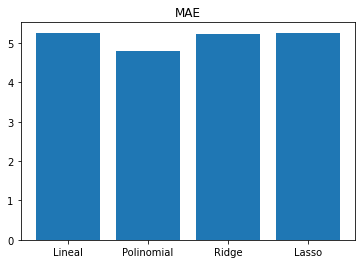

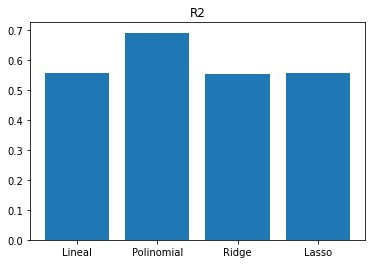

In [239]:
#Errores
model_names = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
maes = [mae, maep, maer, mael]
r2s = [r2, r2p, r2r, r2l]
plt.bar(model_names, maes)
plt.title('MAE')
plt.show()
plt.bar(model_names, r2s)
plt.title('R2')
plt.show()

##¿Qué método conviene más a la empresa?¿Por qué? La regresión polinomial, porque tiene un mejor ajuste a los puntos, resultando en errores más bajos.
##¿Qué porcentajes de entrenamiento y evaluación usaste? 80% entrenamiento, 20% evaluación 
##¿Qué error tienes? Un MAE de aproximadamente 4.9. ¿Es bueno? Debido al ajuste que se puede apreciar, puede ser considerado ligeramente bueno, aunque se nota que existen muchos puntos que no son correctamente descritos por la curva ¿Cómo lo sabes? Por que el MAE no se encuentra muy alejado del 0.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [240]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [242]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [243]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


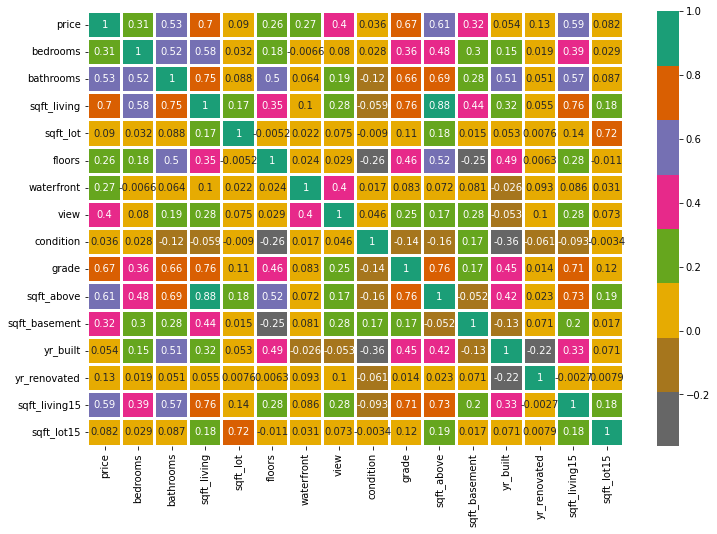

In [244]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [245]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [246]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [247]:
#lineal multiple
multi_linear_model = LinearRegression(fit_intercept=True)
multi_linear_model.fit(X_train, y_train)
multi_coefs = multi_linear_model.coef_[0]
const_b = round(linear_model.intercept_, 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
multi_line_equation = 'y='
for index, coef in enumerate(multi_coefs):
  if coef >= 0 and index:
    multi_line_equation += '+'
  multi_line_equation += f'{round(coef,2)}x{index}'
multi_line_equation += f'{sign}{const_b}'
ymlpred = multi_linear_model.predict(X_test)
print('Regresión Lineal Múltiple')
print(f'Ecuación: {multi_line_equation}')
maeml = metrics.mean_absolute_error(y_test, ymlpred)
rmseml = np.sqrt(metrics.mean_squared_error(y_test, ymlpred))
r2ml = r2_score(y_test, ymlpred)
print('Error medio Absoluto (MAE):', maeml)
print('Root Mean Squared Error:', rmseml)
print('r2_score', r2ml)

Regresión Lineal Múltiple
Ecuación: y=-38200.8x0+41466.14x1+107.99x2+0.02x3+31691.69x4+552691.02x5+41249.32x6+21222.14x7+119493.22x8+47.78x9+60.22x10-3550.9x11+13.26x12+29.01x13-0.55x14+67.12
Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [248]:
#polinomial
print(X.shape)
multi_poly_model = PolynomialFeatures(2)
Xpoly_multi_train = multi_poly_model.fit_transform(X_train)
Xpoly_multi_test = multi_poly_model.fit_transform(X_test)
multi_poly_linear_model = LinearRegression(fit_intercept=True)
multi_poly_linear_model.fit(Xpoly_multi_train, y_train)
multi_const_b = round(multi_linear_model.intercept_[0], 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
max_degree = len(multi_poly_linear_model.coef_[0]) - 1
multi_poly_equation = f'y='
for index, coef in enumerate(multi_poly_linear_model.coef_[0][-1:0:-1]):
  if coef >= 0 and index:
    multi_poly_equation += '+'
  multi_poly_equation += str(round(coef, 3))
  multi_poly_equation += 'x'
  current_degree = max_degree - index
  if current_degree != 1:
    multi_poly_equation += '^'
    multi_poly_equation += str(current_degree)
multi_poly_equation += sign
multi_poly_equation += str(const_b)
ypmpred = multi_poly_linear_model.predict(Xpoly_multi_test)
print('Regresión Polinomial Múltiple')
print(f'Ecuación: {multi_poly_equation}')
maepm = metrics.mean_absolute_error(y_test, ypmpred)
rmsepm = np.sqrt(metrics.mean_squared_error(y_test, ypmpred))
r2pm = r2_score(y_test, ypmpred)
print('Error medio Absoluto (MAE):', maepm)
print('Root Mean Squared Error:', rmsepm)
print('r2_score', r2pm)

(21613, 15)
Regresión Polinomial Múltiple
Ecuación: y=0.0x^135+0.0x^134+0.033x^133+0.0x^132+0.047x^131+1.116x^130+0.019x^129-2.047x^128+0.407x^127+23.061x^126+1.693x^125+2.876x^124+0.016x^123-3.106x^122-1.342x^121+1.694x^120+2.871x^119+0.009x^118-3.208x^117+3.133x^116+4.383x^115-0.509x^114-22.756x^113-10.134x^112-571.967x^111+11.137x^110+9.598x^109+7366.286x^108-0.277x^107+46.32x^106-20.199x^105-307.024x^104+11.956x^103+1.162x^102-6037.967x^101-541.71x^100-0.052x^99+4.634x^98-9.968x^97+72.065x^96-1.774x^95-12.497x^94+17955.521x^93+7339.722x^92+7984.491x^91-0.813x^90+170.605x^89-29.914x^88+4428.592x^87-22.802x^86+183.103x^85-161638.717x^84+9199.491x^83-16050.834x^82-3954540.198x^81-0.529x^80-32.041x^79+2.595x^78+1036.779x^77+7.661x^76-2.823x^75-4279.527x^74+20301.452x^73+14441.431x^72-131323.61x^71+21610.282x^70+0.0x^69+0.0x^68-0.0x^67+0.014x^66+1.183x^65+1.183x^64+0.152x^63+0.092x^62-0.098x^61-0.099x^60+0.441x^59+0.0x^58-1.693x^57-2.873x^56+0.029x^55+3.447x^54+1.775x^53-3.883x^52+20.73

In [249]:
#ridge2
ridge_model2 = Ridge(fit_intercept=True, alpha=100.)
ridge_model2.fit(X_train, y_train)
coefr_a = ridge_model2.coef_[0]
multi_ridge_equation = 'y='
for index, coef in enumerate(multi_coefs):
  if coef >= 0 and index:
    multi_ridge_equation += '+'
  multi_ridge_equation += f'{round(coef,2)}x{index}'
multi_ridge_equation += f'{sign}{const_b}'
constr_b = round(ridge_model2.intercept_[0], 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
line_equation = f'y={coefr_a}x{sign}{constr_b}'
yr2pred = ridge_model2.predict(X_test)
print('Regresión Ridge Múltiple')
print(f'Ecuación: {multi_ridge_equation}')
maer2 = metrics.mean_absolute_error(y_test, yr2pred)
rmser2 = np.sqrt(metrics.mean_squared_error(y_test, yr2pred))
r2r2 = r2_score(y_test, yr2pred)
print('Error medio Absoluto (MAE):', maer2)
print('Root Mean Squared Error:', rmser2)
print('r2_score', r2r2)

Regresión Ridge Múltiple
Ecuación: y=-38200.8x0+41466.14x1+107.99x2+0.02x3+31691.69x4+552691.02x5+41249.32x6+21222.14x7+119493.22x8+47.78x9+60.22x10-3550.9x11+13.26x12+29.01x13-0.55x14+67.12
Error medio Absoluto (MAE): 138203.47631588625
Root Mean Squared Error: 234583.47523048488
r2_score 0.6507141904983357


In [250]:
#Lasso2
lasso_model2 = Lasso(fit_intercept=True)
lasso_model2.fit(X_train, y_train)
coefl_a = lasso_model2.coef_[0]
constl_b = round(lasso_model2.intercept_[0], 3)
if constl_b >= 0:
  sign = '+'
else:
  sign = '-'
multi_lasso_equation = 'y='
for index, coef in enumerate(multi_coefs):
  if coef >= 0 and index:
    multi_lasso_equation += '+'
  multi_lasso_equation += f'{round(coef,2)}x{index}'
multi_lasso_equation += f'{sign}{const_b}'
constr_b = round(ridge_model2.intercept_[0], 3)
if const_b >= 0:
  sign = '+'
else:
  sign = '-'
line_equation = f'y={coefr_a}x{sign}{constr_b}'
print('Regresión Lasso Múltiple')
print(f'Ecuación: {multi_ridge_equation}')
yl2pred = lasso_model2.predict(X_test)
mael2 = metrics.mean_absolute_error(y_test, yl2pred)
rmsel2 = np.sqrt(metrics.mean_squared_error(y_test, yl2pred))
r2l2 = r2_score(y_test, yl2pred)
print('Error medio Absoluto (MAE):', mael2)
print('Root Mean Squared Error:', rmsel2)
print('r2_score', r2l2)

Regresión Lasso Múltiple
Ecuación: y=-38200.8x0+41466.14x1+107.99x2+0.02x3+31691.69x4+552691.02x5+41249.32x6+21222.14x7+119493.22x8+47.78x9+60.22x10-3550.9x11+13.26x12+29.01x13-0.55x14+67.12
Error medio Absoluto (MAE): 137480.57154885164
Root Mean Squared Error: 232134.527538022
r2_score 0.6579689024340813


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


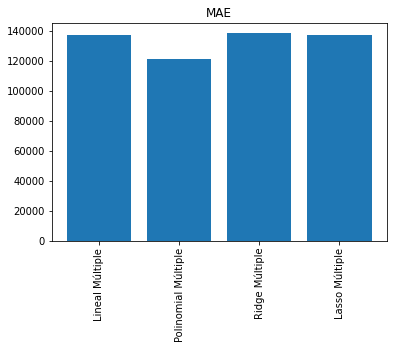

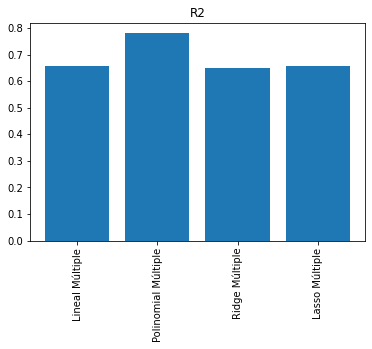

In [251]:
#Errores2
model_names_m = ['Lineal Múltiple', 'Polinomial Múltiple', 'Ridge Múltiple', 'Lasso Múltiple']
maesm = [maeml, maepm, maer2, mael2]
r2sm = [r2ml, r2pm, r2r2, r2l2]
plt.bar(model_names_m, maesm)
plt.xticks(rotation=90)
plt.title('MAE')
plt.show()
plt.bar(model_names_m, r2sm)
plt.title('R2')
plt.xticks(rotation=90)
plt.show()

##¿Qué método conviene más a la empresa?¿Por qué? La regresión polinomial múltiple, porque sus errores son más bajos que los de los demás modelos.
##¿Qué porcentajes de entrenamiento y evaluación usaste? 90% entrenamiento, 10% evaluación 
##¿Qué error tienes? Un MAE de aproximadamente 120 mil. ¿Es bueno? No, no es bueno. ¿Cómo lo sabes? El MAE se encuentra muy alejado del 0.